In [1]:
from imports import *
from exactDiagMethods import build_exact_diag_hamiltonian, perform_exact_diag
from globalMethods import  build_initial_states, output_results
from vqteMethods import hamiltonian_generation, perform_vqte



In [ ]:

def main():
    # Initialize the simulation parameters
    N = 1
    gamma_L= 100
    gamma_R = 100

    eps = 1

    mu_L= 0.1
    mu_R= 2
    T_L = 30   
    T_R= 10
    beta_L=1/T_L
    beta_R=1/T_R
    F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
    F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)
    J = 100
  
    time = 100.0
    dt = 0.1
    nt = int(time/dt)
    #exact_diag_ham= build_exact_diag_hamiltonian(N,J, eps)
   # print("Exact Ham", exact_diag_ham)

   
    ham_real, ham_imag = hamiltonian_generation(N, eps, gamma_L, gamma_R, F_L, F_R,J)
    print("Ham imag", ham_imag)
    print("Ham real", ham_real)

    exact_diag_results, time_points = [],[]

    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real,N)
    #exact_diag_results, time_points = perform_exact_diag(gamma_L, gamma_R, F_L, F_R, dt, nt, exact_diag_init_state,exact_diag_ham,N,eps)

    print("VQTE initial state", vqte_init_state)
    print("Exact initial state:",exact_diag_init_state)
    vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values,N)
    
    # # Output results
    output_results(vqte_results, exact_diag_results, time, nt, time_points)
    print(vqte_results[-1][-1])

Ham imag SparsePauliOp(['XXI', 'YYI', 'IXX', 'IYY', 'III', 'ZII', 'IIZ'],
              coeffs=[-25.        +0.j,  25.        +0.j, -25.        +0.j,  25.        +0.j,
 100.        +0.j,  -0.37497188+0.j,   1.24895937+0.j])
Ham real SparsePauliOp(['ZII', 'ZII', 'IZI', 'IZI', 'IIZ', 'IIZ', 'XXI', 'YYI', 'IXX', 'IYY', 'XYI', 'YXI', 'IXY', 'IYX'],
              coeffs=[ -0.5       +0.j,   0.5       +0.j,  -0.5       +0.j,   0.5       +0.j,
  -0.5       +0.j,   0.5       +0.j, 100.        +0.j, 100.        +0.j,
 100.        +0.j, 100.        +0.j,  -0.37497188+0.j,  -0.37497188+0.j,
   1.24895937+0.j,   1.24895937+0.j])
VQTE initial state Statevector([ 1.00000000e+00+7.34788079e-16j,
             -1.22464680e-16-5.99903913e-32j,
             -1.22464680e-16-5.99903913e-32j,
             -1.22464680e-16+2.73691106e-48j,
             -2.44929360e-16-8.99855870e-32j,
              4.49927935e-32-1.21543267e-63j,
             -1.22464680e-16+0.00000000e+00j,
              4.49927935e-32-1.469

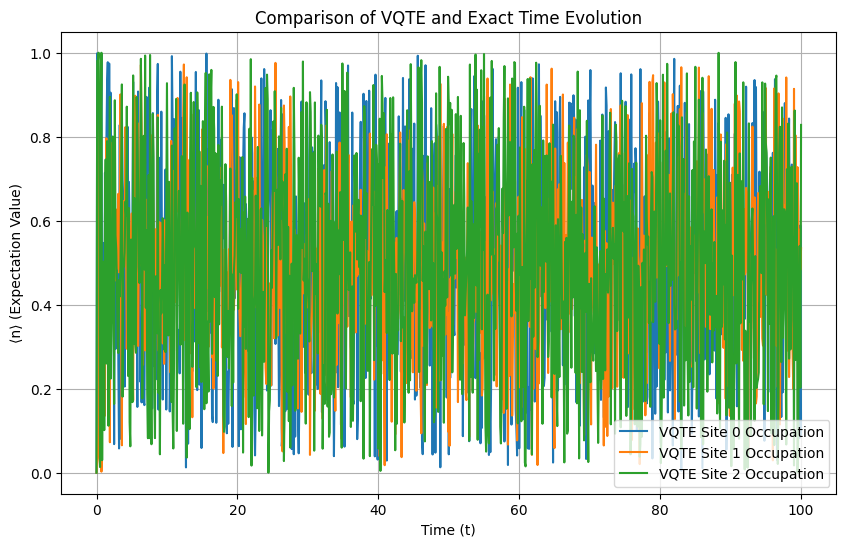

0.8279350012650553


In [3]:
main()